# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data
### By: Zack Crowley

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Write the executable path and open a browser window with webdriver_manager:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [8]:
# Extract all rows of data from the table on the website:
results = soup.find_all('tr', class_="data-row")
print(results)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

In [9]:
# Extract all column headers for the data:
cols = soup.find_all('th')
print(cols)

[<th>id</th>, <th>terrestrial_date</th>, <th>sol</th>, <th>ls</th>, <th>month</th>, <th>min_temp</th>, <th>pressure</th>]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [22]:
# Create an empty list to hold the rows
row_list = []
# Loop through the scraped data to create a list of rows
for result in results:
    # save each td tag to an object and use that to find the next sibling tag: 
    id_td = result.find('td')
    terrestrial_date_td = id_td.find_next_sibling('td')
    sol_td = terrestrial_date_td.find_next_sibling('td')
    ls_td = sol_td.find_next_sibling('td')
    month_td = ls_td.find_next_sibling('td')
    min_temp_td = month_td.find_next_sibling('td')
    pressure_td = min_temp_td.find_next_sibling('td')
    # Convert each stored td tag object to text: 
    id = id_td.text
    terrestrial_date = terrestrial_date_td.text
    sol = sol_td.text
    ls = ls_td.text
    month = month_td.text
    min_temp = min_temp_td.text
    pressure = pressure_td.text
    # Store all of the text from the td tag objects for a single row from the table data
    #  as a dictionary with the keys as the column names for the dataframe later: 
    row_dict = {
            'id': id,
            'terrestrial_date': terrestrial_date,
            'sol' : sol,
            'ls' : ls,
            'month' : month,
            'min_temp' : min_temp,
            'pressure' : pressure 
            }
    
    # Add each row dictionary to the list, row_list is now a list of dictionaries, 
    # where each row is represented by a single dictionary:
    row_list.append(row_dict)

In [24]:
# Create a Pandas DataFrame by converting the list of row dictionarys (same as a JSON at this point) to a df, Pandas will use the keys to match to the columns and put together all the rows:
mars_data = pd.DataFrame(row_list)

In [25]:
# Confirm DataFrame was created successfully
mars_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [26]:
# Save to .csv once it is scrapped and before cleaning/analysis:
mars_data.to_csv("Output/mars_data.csv", index=False)

In [28]:
# Quit browser once scraped data is saved to csv:
browser.quit()

In [3]:
# Read in mars data:
mars_data = pd.read_csv("Output/mars_data.csv")
mars_data.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [4]:
# Examine data type of each column
mars_data.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [5]:
# Change data types for data analysis
# Change "id" column to 'object' type:
mars_data["id"] = mars_data["id"].astype(object)

# Change "terrestrial_date" column to 'date' type:
mars_data["terrestrial_date"] = pd.to_datetime(mars_data['terrestrial_date'], infer_datetime_format=True)


In [17]:
# Confirm type changes were successful by examining data types again
mars_data.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [7]:
# 1. How many months are there on Mars?
print(mars_data['month'].value_counts(sort=False))
months_mars = len(mars_data["month"].unique())
print(f'There are {months_mars} months on Mars.')

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64
There are 12 months on Mars.


There are 12 months on Mars.

In [8]:
# 2. How many Martian days worth of data are there?
solCount_mars = mars_data['sol'].count()
print(f"There are {solCount_mars} Martian days worth of data in the table.")

There are 1867 Martian days worth of data in the table.


There are 1867 Martian days worth of data in the table.


In [9]:
# 3. What is the average low temperature by month?
mean_minTemp_byMonth = mars_data.groupby("month").mean()["min_temp"]
mean_minTemp_byMonth

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

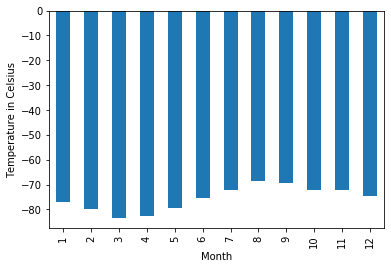

In [10]:
# Plot the average temperature by month
mean_minTemp_byMonth.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.show()

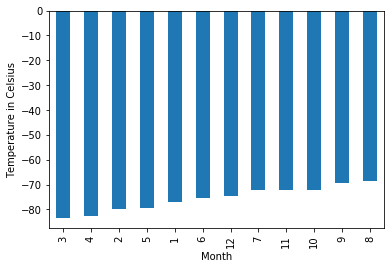

In [11]:
# Identify the coldest and hottest months in Curiosity's location
# Grouby month and take the average min_temp, then sort the values to plot/find the coldest and hottest months in Curiosity's location:
mean_minTemp_byMonth_sort = mars_data.groupby("month").mean()["min_temp"].sort_values()
mean_minTemp_byMonth_sort.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.show()

In [21]:
# Identify the coldest and hottest months in Curiosity's location- Contiued:
# Find the index of the max and min of the average monthly min_temp and print out:
hot_month_Mars = mean_minTemp_byMonth_sort.idxmax()
cold_month_Mars = mean_minTemp_byMonth_sort.idxmin()
print(f"The coldest average minimum temperture recorded by Curiosity was in month {cold_month_Mars} and the hottest average minimum temperture recorded by Curiosity was in month {hot_month_Mars}.")

The coldest average minimum temperture recorded by Curiosity was in month 3 and the hottest average minimum temperture recorded by Curiosity was in month 8.


On Mars, the third month has the coldest minimum temperature on average, and the eighth month has the warmest minimum temperature on average. 

The monthly average minimum temperatures throughout the Martian year are very low ranging from -68 to -83 Celsius.

In [12]:
# 4. Average pressure by Martian month
mean_AtmoPressure_byMonth = mars_data.groupby("month").mean()["pressure"]
mean_AtmoPressure_byMonth

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

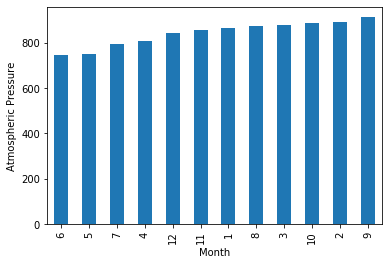

In [13]:
# Plot the average pressure by month
mean_AtmoPressure_byMonth_sort = mars_data.groupby("month").mean()["pressure"].sort_values()
mean_AtmoPressure_byMonth_sort.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.show()

Average atmospheric pressure on Mars is the lowest in the sixth month at about 745 and highest in the ninth at about 913.

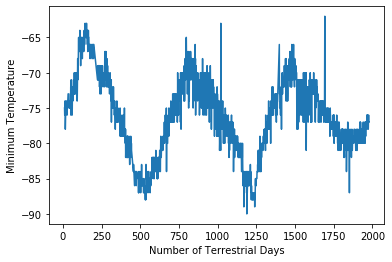

In [14]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Show plot of minimum temperatures on Mars by the number of 
# terrestrial days the Curiosity rover was on Mars:
MinTemp_bySol = mars_data[["sol","min_temp"]].set_index("sol")
MinTemp_bySol.plot(legend=False)
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.show()

In [15]:
# 5. How many terrestrial (earth) days are there in a Martian year? Continued:
# First set the df only 'sol' and 'min_temp' and set 'sol' as the index:
MinTemp_bySol = mars_data[["sol","min_temp"]].set_index("sol")
# Find the approximate second peak using iloc:
peak1 = MinTemp_bySol.iloc[650:700]
# Find the index of the max of the second peak using idxmax:
peak1peak = peak1.idxmax()
# Find the approximate third peak using iloc:
peak2 = MinTemp_bySol.iloc[1300:1350]
# Find the index of the max of the third peak using idxmax:
peak2peak = peak2.idxmax()
peak2peak
# Now that we have the sol (earth day) of the second and third peak we can
# subtract them to find the approximate length of the Martian year in Earth days (sol) based on the minimum temperatures in the table data:
Martian_Year = int(peak2peak - peak1peak)
print(f"There are approximately {Martian_Year} Earth days in the Martian year according to the data of minimum temperatures in the table.")

There are approximately 697 Earth days in the Martian year according to the data of minimum temperatures in the table.


There are approximately 697 Earth days in the Martian year according to the data of minimum temperatures in the table. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [16]:
# Write the data to a CSV
mars_data.to_csv("Output/mars_data.csv", index=False)